# CS 6476 Project 1: Image Filtering and Hybrid Images

All projects in this course will be done with these iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).

If there are any notes you wish to leave for the TAs as they test your code, you may leave them here.

## Setup

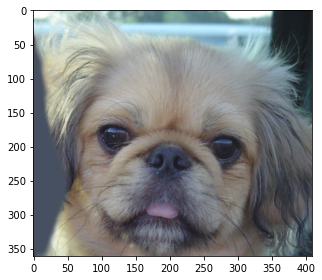

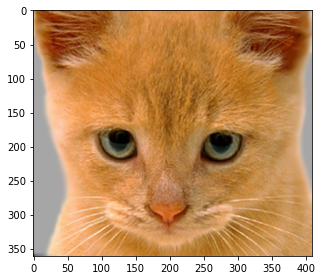

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import vis_hybrid_image, load_image, save_image
from student_code import my_imfilter, create_hybrid_image
%load_ext autoreload
%autoreload 2

image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/cat.bmp')


plt.figure(figsize=(5,5)); plt.imshow((image1*255).astype(np.uint8));
plt.figure(figsize=(5,5)); plt.imshow((image2*255).astype(np.uint8));

## Create filter

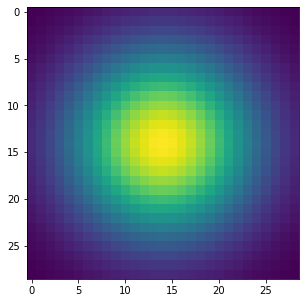

In [2]:
cutoff_frequency = 7
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

plt.figure(figsize=(5,5)); plt.imshow(filter);

## Apply filter to image
Both functions you need to implement in this project can be found in _student_\__code.py_. Start by implementing _my_\__imfilter_, which takes both a filter and an image, and returns the filtered image. This code block will use your _my_\__imfilter_ function to create and display a blurry version of the dog image.

In [3]:
import numpy as np

def my_imfilter(image, filter):

 
    X = image[:,:,0]
    Y = image[:,:,1]
    Z = image[:,:,2]
    
    dimensions = len (filter)
    pad_value = int (dimensions * 0.5)
    padding = [pad_value, pad_value]
    thepad = (padding, padding)
    
    picpad = list()
    picpad.append(np.pad(X, thepad, mode = 'symmetric'))
    picpad.append(np.pad(Y, thepad, mode = 'symmetric'))
    picpad.append(np.pad(Z, thepad, mode = 'symmetric'))
    
    
    output = np.ones_like(Z, order = 'K')
    
    
    X_form = X.shape[0]
    Y_form = Y.shape[1]
    
    
    for i in picpad:
        imgpad = list()
 
        for i1 in range (X_form):
        
            for i2 in range (Y_form):
                
                AllDone = np.sum(np.multiply(i[i1:i1 + dimensions, i2:i2 + dimensions], filter))
                imgpad.append(AllDone)
                
        imgpad = np.array(imgpad)
        imgpad = imgpad.reshape(X_form, Y_form, order = 'C')
        output = np.dstack((output, imgpad))
        
    
    outcome = output[:, :, 1:]

    return outcome
    


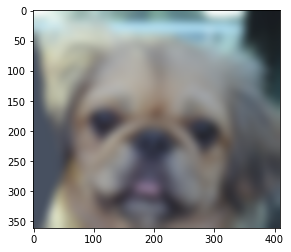

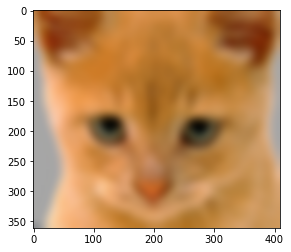

In [4]:
blurry_dog = my_imfilter(image1, filter)
plt.figure(); plt.imshow((blurry_dog*255).astype(np.uint8));
blurry_cat = my_imfilter(image2, filter)
plt.figure(); plt.imshow((blurry_cat*255).astype(np.uint8));

## Create hybrid image
Next, implement _create_\__hybrid_\__image_, which takes two images and makes a hybrid image using the low frequency content from one image and the high frequency content from another.

In [5]:
def create_hybrid_image(image1, image2, filter) :

  assert image1.shape[0] == image2.shape[0]
  assert image1.shape[1] == image2.shape[1]
  assert image1.shape[2] == image2.shape[2]
        
        
  low_frequencies = my_imfilter(image1, filter)
  high_frequencies =  image2 - my_imfilter(image2, filter)
    
  hybrid_img = high_frequencies + low_frequencies
  hybrid_image = np.minimum(1.0, np.maximum(hybrid_img,0.0))

  return low_frequencies, high_frequencies, hybrid_image




In [6]:
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, filter)
vis = vis_hybrid_image(hybrid_image)


## Show results

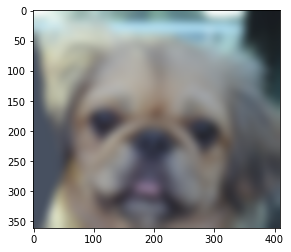

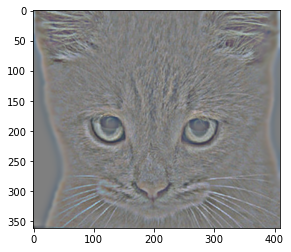

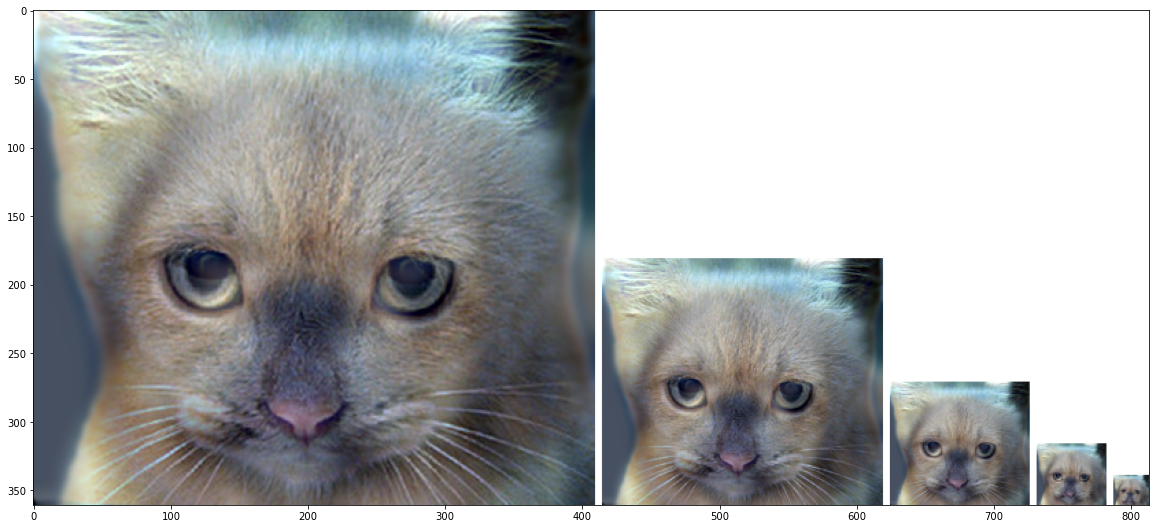

In [7]:
plt.figure(); plt.imshow((low_frequencies*255).astype(np.uint8));
plt.figure(); plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis);

## Save results

In [8]:
save_image('../results/low_frequencies.jpg', low_frequencies)
save_image('../results/high_frequencies.jpg', high_frequencies+0.5)
save_image('../results/hybrid_image.jpg', hybrid_image)
save_image('../results/hybrid_image_scales.jpg', vis)

True